In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for better viewing
pd.set_option('display.max_columns',None)

In [12]:
df = pd.read_csv('sales.csv')
df.head()

,Date,Product,Units_Sold,Unit_Price
0,01-10-2025,A,10,50
1,02-10-2025,B,15,40
2,03-10-2025,C,8,60
3,04-10-2025,A,12,50


In [29]:
#check for missing values
print(df.isnull().sum())

#fill missing numbers with 0
df.fillna(0, inplace=True)

#convert 'date' to datetime type if needed
df['Date'] = pd.to_datetime(df['Date'])

#check column types
df.info()

Date           0
Product        0
Units_Sold     0
Unit_Price     0
date           0
Total_Sales    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4 non-null      datetime64[ns]
 1   Product      4 non-null      object        
 2   Units_Sold   4 non-null      int64         
 3   Unit_Price   4 non-null      int64         
 4   date         4 non-null      datetime64[ns]
 5   Total_Sales  4 non-null      int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 324.0+ bytes


In [30]:
df['Total_Sales'] = np.multiply(df['Units_Sold'], df['Unit_Price'])
df.head()

,Date,Product,Units_Sold,Unit_Price,date,Total_Sales
0,2025-01-10,A,10,50,2025-01-10,500
1,2025-02-10,B,15,40,2025-02-10,600
2,2025-03-10,C,8,60,2025-03-10,480
3,2025-04-10,A,12,50,2025-04-10,600


In [15]:
total_revenue = df['Total_Sales'].sum()
avg_units = df.groupby('Product')['Units_Sold'].mean()
top_product = df.groupby('Product')['Total_Sales'].sum().idxmax()

print(f" 💰 Total Revenue:{total_revenue}")
print("\n📦 Average Units Sold per Product:\n",avg_units)
print(f"\n🏆  Top Selling Product:{top_product}")

 💰 Total Revenue:2180

📦 Average Units Sold per Product:
 Product
A    11.0
B    15.0
C     8.0
Name: Units_Sold, dtype: float64

🏆  Top Selling Product:A


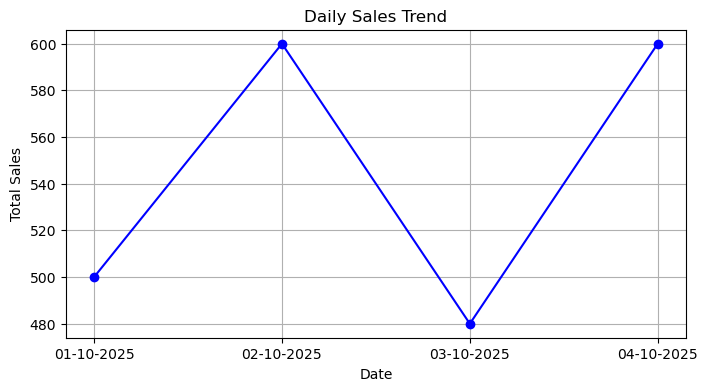

In [26]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'],df['Total_Sales'],marker='o',color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



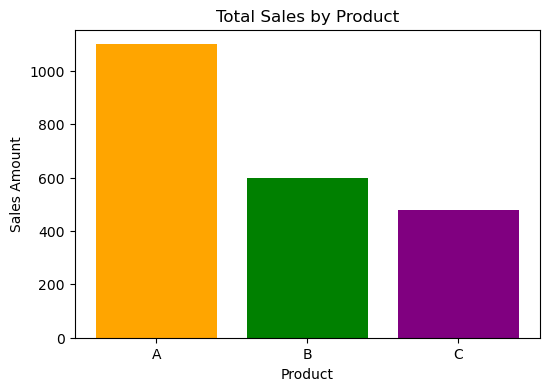

In [25]:
product_sales =df.groupby('Product')['Total_Sales'].sum()
plt.figure(figsize=(6,4))
plt.bar(product_sales.index, product_sales.values,color=['orange','green','purple'])
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.show()